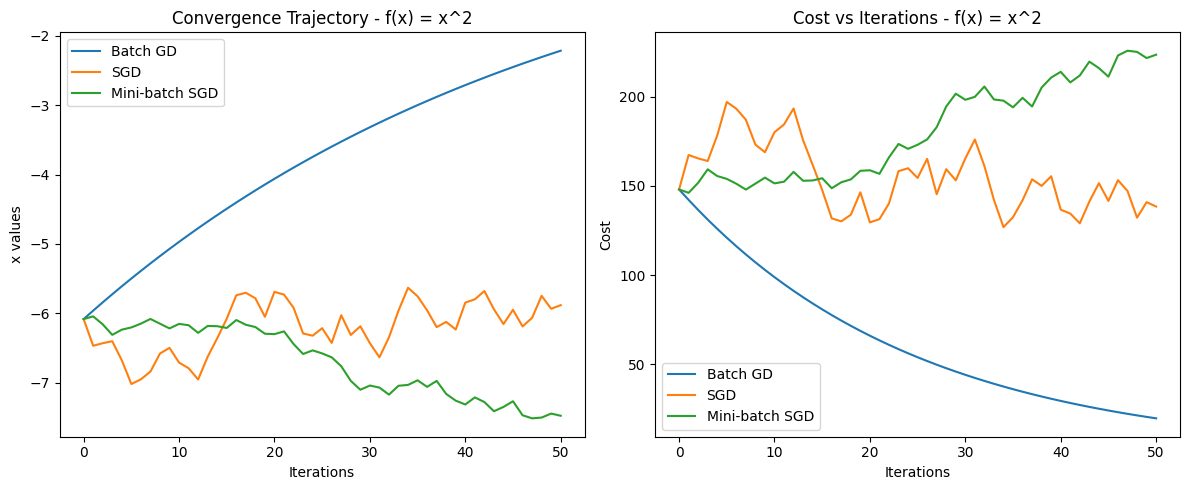

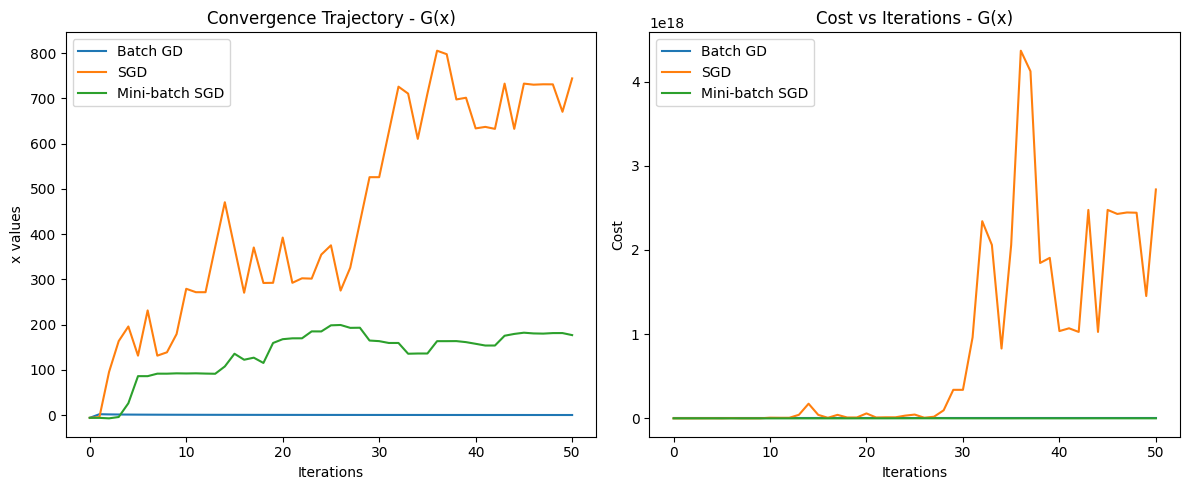

Final optimal values for f(x) = x^2:
Batch GD: -2.2154, SGD: -5.8828, Mini-batch SGD: -7.4769
Final optimal values for G(x) = x^4 + x^3 + x^2:
Batch GD: 0.1613, SGD: 743.9858, Mini-batch SGD: 176.7277


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the functions and their gradients
def f(x):
    return x**2

def df(x):
    return 2*x

def G(x):
    return x**4 + x**3 + x**2

def dG(x):
    return 4*x**3 + 3*x**2 + 2*x

# Gradient Descent Implementation
def gradient_descent(grad, x_init, lr=0.01, epochs=50, method='batch', batch_size=5, max_value=1e4):
    x = x_init
    trajectory = [x]
    cost = [grad(x)**2]

    for _ in range(epochs):
        if method == 'sgd':
            x_sample = np.random.uniform(-20, 20)  # Single random point
        elif method == 'mini-batch':
            sample = np.mean(np.random.uniform(-20, 20, batch_size))  # Mean of random batch
            x_sample = sample
        else:  # Batch GD
            x_sample = x

        gradient = grad(x_sample)

        # Clamp gradient if too large
        if abs(gradient) > max_value:
            gradient = np.sign(gradient) * max_value

        x -= lr * gradient

        if abs(x) > max_value:
            print(f"Warning: Value exceeded (max_value). Stopping optimization.")
            break

        trajectory.append(x)
        cost.append(grad(x)**2)

    return x, trajectory, cost

# Initialize
x_init = np.random.uniform(-20, 20)
learning_rate = 0.01
epochs = 50
batch_size = 5

# Run Gradient Descent for f(x)
x_final_batch_f, traj_batch_f, cost_batch_f = gradient_descent(df, x_init, learning_rate, epochs, 'batch')
x_final_sgd_f, traj_sgd_f, cost_sgd_f = gradient_descent(df, x_init, learning_rate, epochs, 'sgd')
x_final_mini_f, traj_mini_f, cost_mini_f = gradient_descent(df, x_init, learning_rate, epochs, 'mini-batch')

# Run Gradient Descent for G(x)
x_final_batch_G, traj_batch_G, cost_batch_G = gradient_descent(dG, x_init, learning_rate, epochs, 'batch')
x_final_sgd_G, traj_sgd_G, cost_sgd_G = gradient_descent(dG, x_init, learning_rate, epochs, 'sgd')
x_final_mini_G, traj_mini_G, cost_mini_G = gradient_descent(dG, x_init, learning_rate, epochs, 'mini-batch')

# Plot convergence for f(x)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(traj_batch_f, label="Batch GD")
plt.plot(traj_sgd_f, label="SGD")
plt.plot(traj_mini_f, label="Mini-batch SGD")
plt.title("Convergence Trajectory - f(x) = x^2")
plt.xlabel("Iterations")
plt.ylabel("x values")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(cost_batch_f, label="Batch GD")
plt.plot(cost_sgd_f, label="SGD")
plt.plot(cost_mini_f, label="Mini-batch SGD")
plt.title("Cost vs Iterations - f(x) = x^2")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.legend()
plt.tight_layout()
plt.show()

# Plot convergence for G(x)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(traj_batch_G, label="Batch GD")
plt.plot(traj_sgd_G, label="SGD")
plt.plot(traj_mini_G, label="Mini-batch SGD")
plt.title("Convergence Trajectory - G(x)")
plt.xlabel("Iterations")
plt.ylabel("x values")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(cost_batch_G, label="Batch GD")
plt.plot(cost_sgd_G, label="SGD")
plt.plot(cost_mini_G, label="Mini-batch SGD")
plt.title("Cost vs Iterations - G(x)")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.legend()
plt.tight_layout()
plt.show()

# Print final results
print("Final optimal values for f(x) = x^2:")
print(f"Batch GD: {x_final_batch_f:.4f}, SGD: {x_final_sgd_f:.4f}, Mini-batch SGD: {x_final_mini_f:.4f}")

print("Final optimal values for G(x) = x^4 + x^3 + x^2:")
print(f"Batch GD: {x_final_batch_G:.4f}, SGD: {x_final_sgd_G:.4f}, Mini-batch SGD: {x_final_mini_G:.4f}")


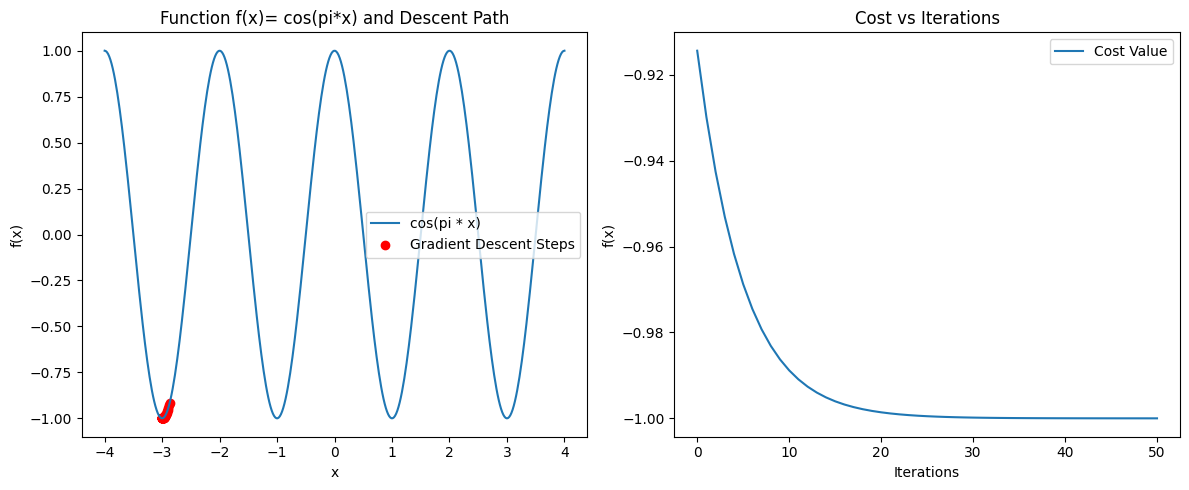

Initial x: -2.8673
Final optimized x: -2.9993
Final function value: -1.0000


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Given function and its derivative
def f(x):
    return np.cos(np.pi * x)

def df(x):
    return -np.pi * np.sin(np.pi * x)

# Gradient Descent function
def gradient_descent(grad, x_init, lr=0.01, epochs=50):
    x = x_init
    trajectory = [x]
    cost = [f(x)]
    for _ in range(epochs):
        x -= lr * grad(x)
        trajectory.append(x)
        cost.append(f(x))
    return x, trajectory, cost

# Initial point and parameters
x_init = np.random.uniform(-4, 4)
learning_rate = 0.01
epochs = 50

# Perform gradient descent
x_final, x_trajectory, cost_trajectory = gradient_descent(df, x_init, learning_rate, epochs)

# Plot the results
x_vals = np.linspace(-4, 4, 400)
y_vals = f(x_vals)

plt.figure(figsize=(12, 5))

# Function plot
plt.subplot(1, 2, 1)
plt.plot(x_vals, y_vals, label="cos(pi * x)")
plt.scatter(x_trajectory, f(np.array(x_trajectory)), color='red', label="Gradient Descent Steps")
plt.title("Function f(x)= cos(pi*x) and Descent Path")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()

# Cost plot
plt.subplot(1, 2, 2)
plt.plot(cost_trajectory, label="Cost Value")
plt.title("Cost vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("f(x)")
plt.legend()

plt.tight_layout()
plt.show()

# Print final optimized x value
print(f"Initial x: {x_init:.4f}")
print(f"Final optimized x: {x_final:.4f}")
print(f"Final function value: {f(x_final):.4f}")


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Load dataset
data = pd.read_csv("diabetes.csv")

# Handle missing values and anomalies
columns_with_zeros = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for col in columns_with_zeros:
    median = data[col].median()
    data[col] = data[col].replace(0, median)

# Handle class imbalance
X = data.drop("Outcome", axis=1)
y = data["Outcome"]
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

# Build a Deep Neural Network model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation="relu"),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=100,
                    batch_size=32,
                    callbacks=[early_stopping],
                    verbose=1)

# Evaluate the model
eval_results = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {eval_results[0]:.4f}")
print(f"Test Accuracy: {eval_results[1]:.4f}")

# Generate classification metrics
y_pred = (model.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test))
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'diabetes.csv'